In [1]:
## 06-07. 다층 퍼셉트론으로 손글씨 분류하기 

%matplotlib inline

import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits

digits = load_digits() # 1,979개의 이미지 데이터 로드
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [2]:
print(digits.target[0])

0


In [3]:
print('전체 샘플의 수: {}'.format(len(digits.images)))

전체 샘플의 수: 1797


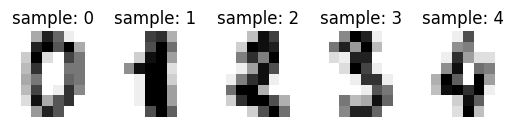

In [4]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):   # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation = 'nearest')
    plt.title('sample: %i' % label)

In [5]:
for i in range(5): 
    print(i, '번 인덱스 샘플의 레이블: ', digits.target[i])

0 번 인덱스 샘플의 레이블:  0
1 번 인덱스 샘플의 레이블:  1
2 번 인덱스 샘플의 레이블:  2
3 번 인덱스 샘플의 레이블:  3
4 번 인덱스 샘플의 레이블:  4


In [6]:
# digits.images: 모든 샘플을 8 * 8 행렬로 저장
# digits.data: 64차원의 벡터로 변환하여 저장 
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [7]:
X = digits.data
Y = digits.target

In [10]:
import torch 
import torch.nn as nn
from torch import optim

model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(), 
    nn.Linear(32, 16), 
    nn.ReLU(), 
    nn.Linear(16, 10)
)

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

losses = []
for epoch in range(100): 
    optimizer.zero_grad()
    # forward 연산
    y_pred = model(X)   

    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0: 
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

    losses.append(loss.item())

Epoch    0/100 Cost: 2.765635
Epoch   10/100 Cost: 2.030912
Epoch   20/100 Cost: 1.664573
Epoch   30/100 Cost: 1.313785
Epoch   40/100 Cost: 1.007774
Epoch   50/100 Cost: 0.743967
Epoch   60/100 Cost: 0.547391
Epoch   70/100 Cost: 0.416700
Epoch   80/100 Cost: 0.330567
Epoch   90/100 Cost: 0.272208


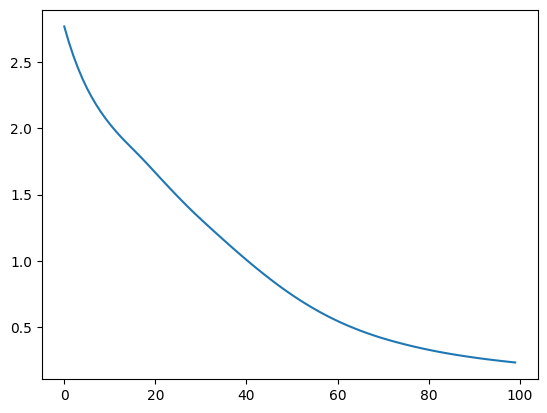

In [11]:
plt.plot(losses)